In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as sns

# Any results you write to the current directory are saved as output.

['train_LZdllcl.csv', 'test_2umaH9m.csv', 'sample_submission_M0L0uXE.csv']


In [2]:
train=pd.read_csv('../input/train_LZdllcl.csv')
test=pd.read_csv('../input/test_2umaH9m.csv')
sample=pd.read_csv('../input/sample_submission_M0L0uXE.csv')


In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
sample.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [6]:
train.shape
#test.shape

(54808, 14)

In [7]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [8]:
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


what i have seen so far  is we have some missing values of previous_year_rating so fill the missing values with mean.

In [9]:
train['previous_year_rating']=train['previous_year_rating'].fillna(train['previous_year_rating'].mean())

In [10]:
test['previous_year_rating']=test['previous_year_rating'].fillna(train['previous_year_rating'].mean())

In [11]:
train.describe()
#test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.211661,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [12]:
train['not_promoted']=1-train['is_promoted']

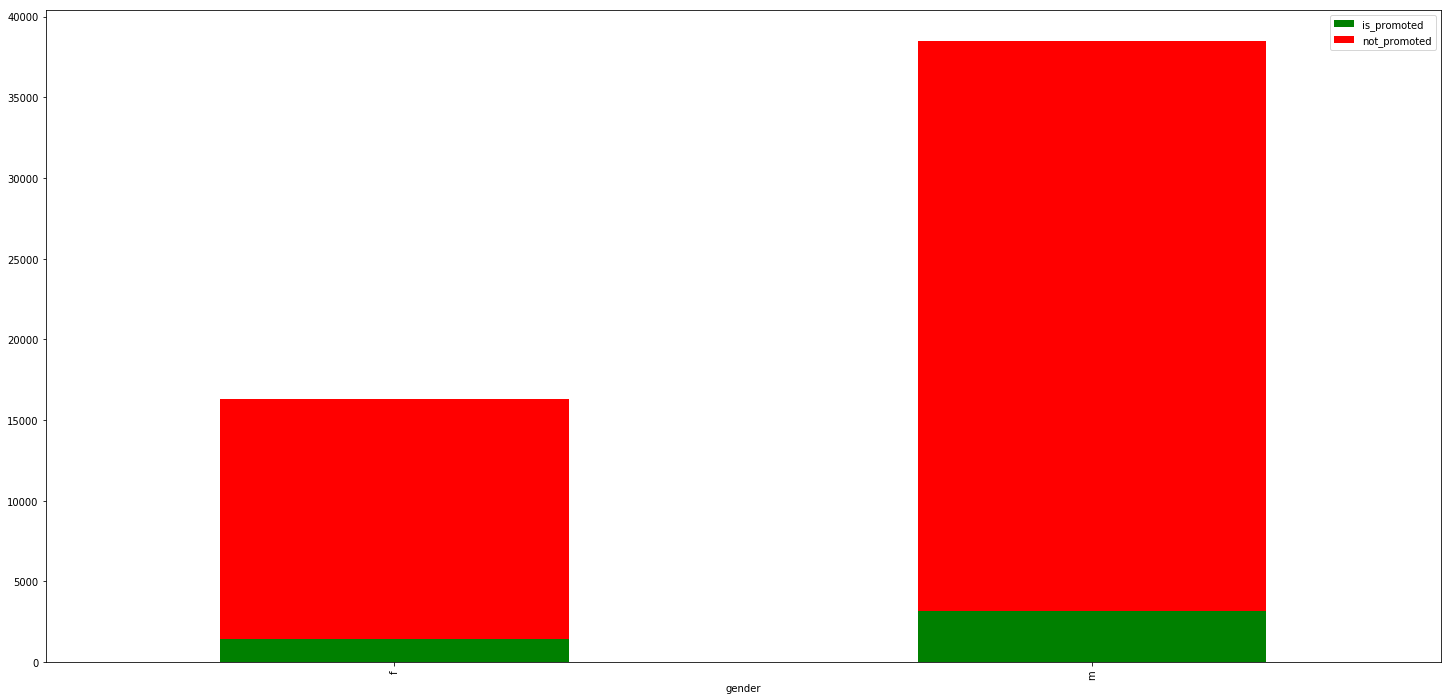

In [13]:
train.groupby('gender').agg('sum')[['is_promoted','not_promoted']].plot(kind='bar',figsize=(25,12),color=['g','r'],stacked=True)

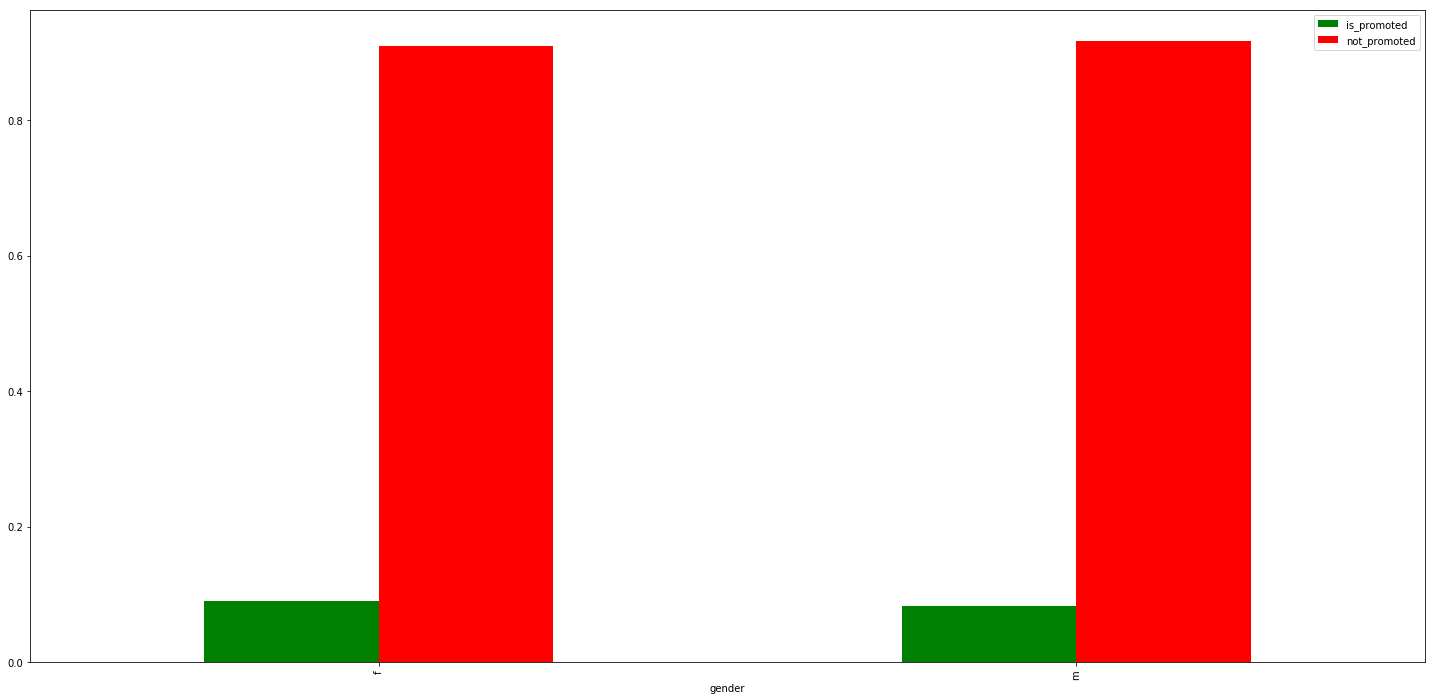

In [14]:
train.groupby('gender').agg('mean')[['is_promoted','not_promoted']].plot(kind='bar',figsize=(25,12),color=['g','r'])

it is observed that most people are not promoted

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


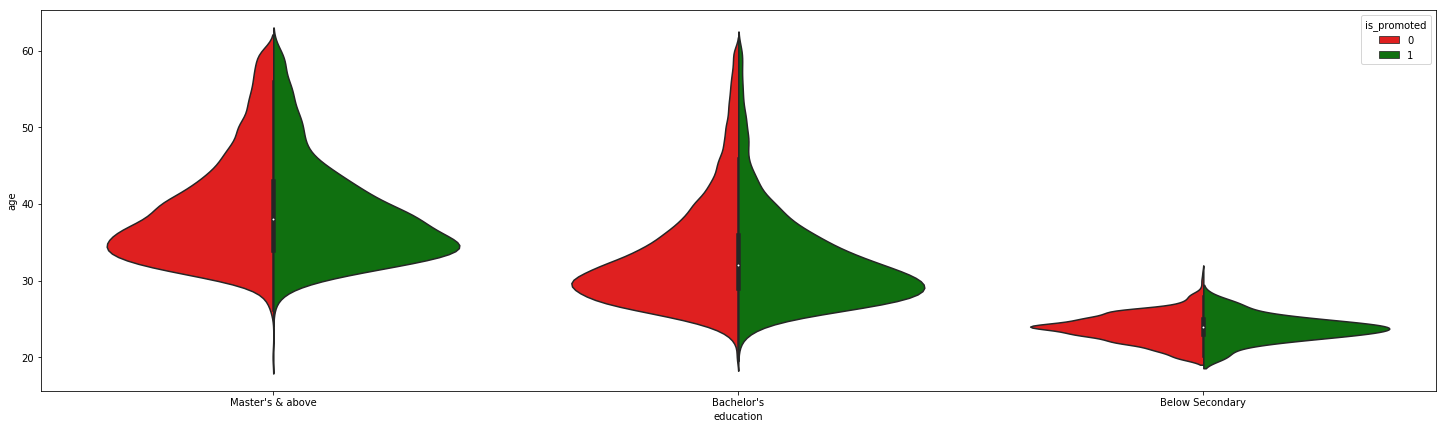

In [15]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='education', y='age', 
               hue='is_promoted', data=train, 
               split=True,
               palette={0: "r", 1: "g"}
              );

In [16]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder_X = LabelEncoder()
#train.iloc[:,3] = labelencoder_X.fit_tranform(train.iloc[:,3])


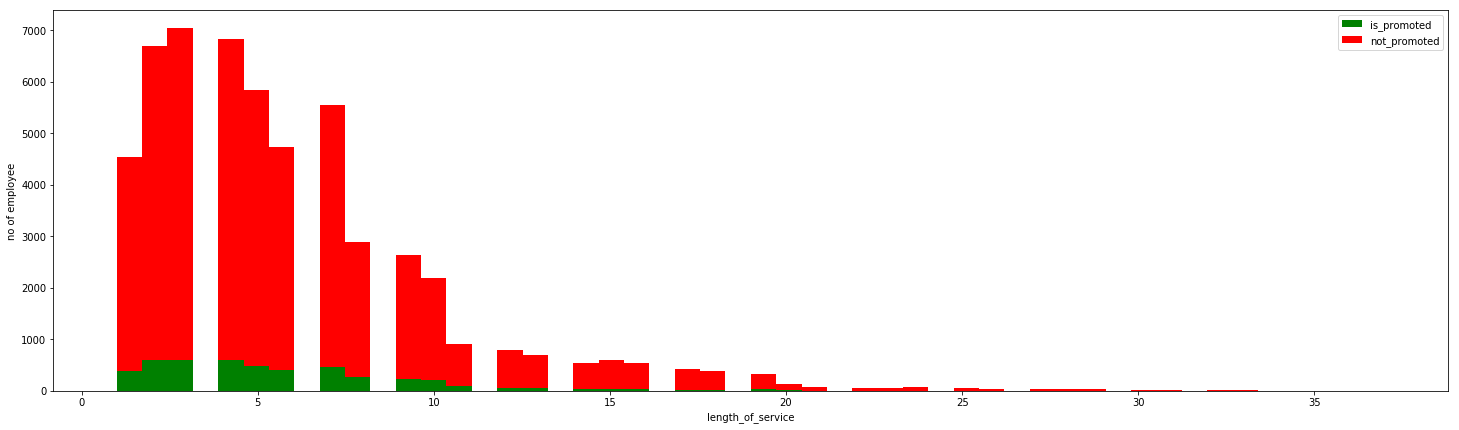

In [17]:
figure = plt.figure(figsize=(25,7))
plt.hist([train[train['is_promoted']==1]['length_of_service'],train[train['is_promoted']==0]['length_of_service']],stacked=True,color = ['g','r'],
        bins=50,label = ['is_promoted','not_promoted'])
plt.xlabel('length_of_service')
plt.ylabel('no of employee')
plt.legend();

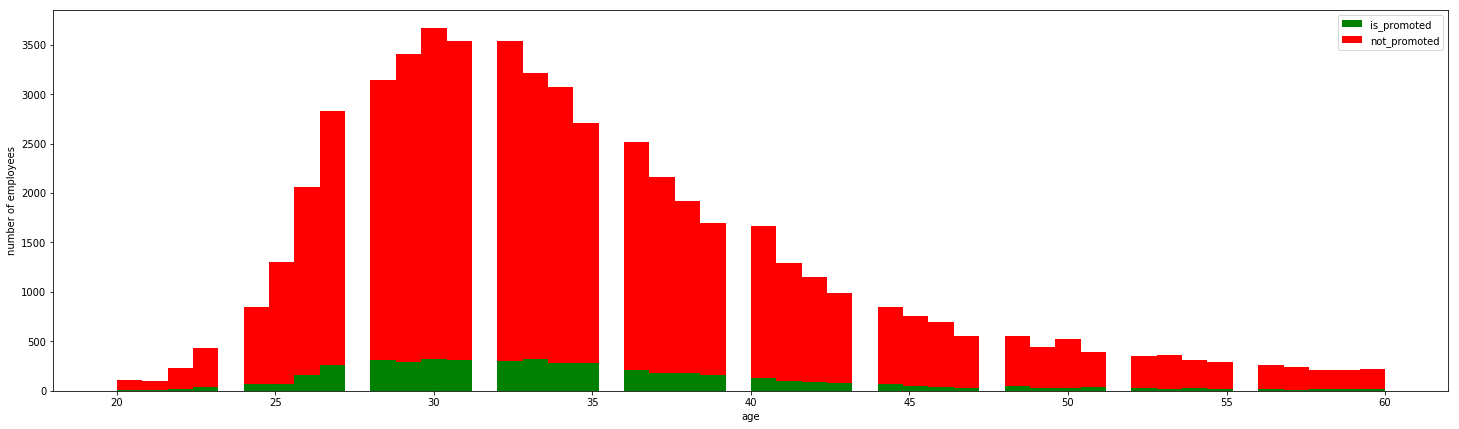

In [18]:
figure = plt.figure(figsize=(25, 7))
plt.hist([train[train['is_promoted'] == 1]['age'], train[train['is_promoted'] == 0]['age']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['is_promoted','not_promoted'])
plt.xlabel('age')
plt.ylabel('number of employees')
plt.legend();

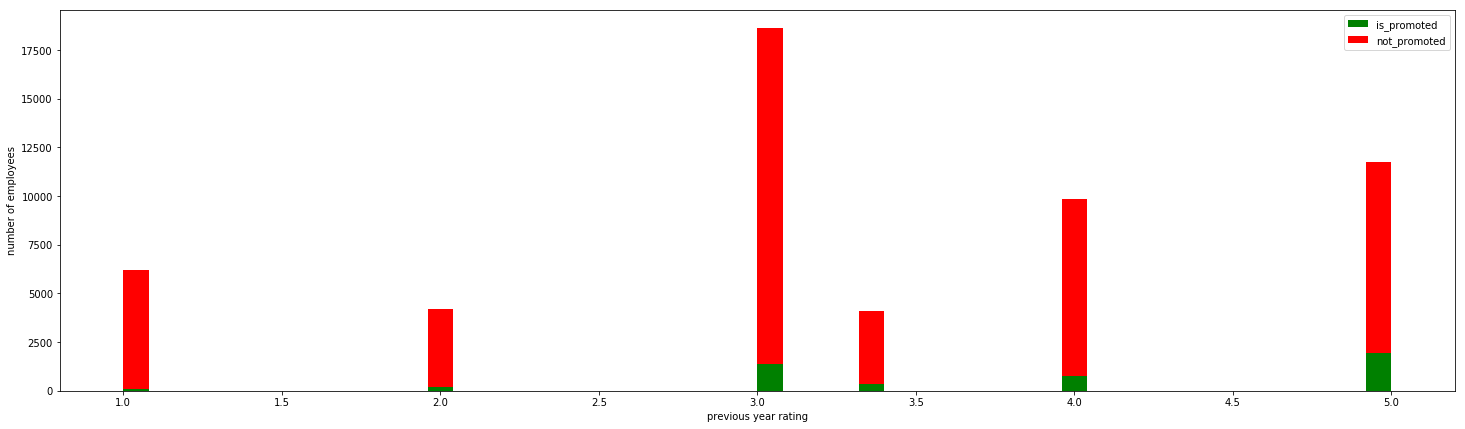

In [19]:
figure = plt.figure(figsize=(25, 7))
plt.hist([train[train['is_promoted'] == 1]['previous_year_rating'], train[train['is_promoted'] == 0]['previous_year_rating']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['is_promoted','not_promoted'])
plt.xlabel('previous year rating')
plt.ylabel('number of employees')
plt.legend();

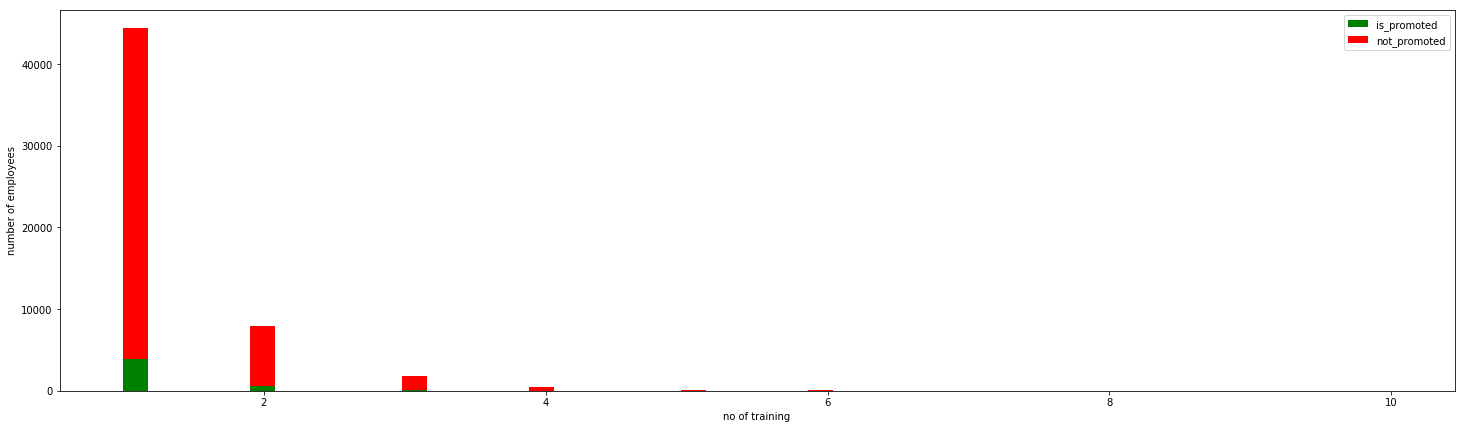

In [20]:
figure = plt.figure(figsize=(25, 7))
plt.hist([train[train['is_promoted'] == 1]['no_of_trainings'], train[train['is_promoted'] == 0]['no_of_trainings']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['is_promoted','not_promoted'])
plt.xlabel('no of training')
plt.ylabel('number of employees')
plt.legend();

No handles with labels found to put in legend.


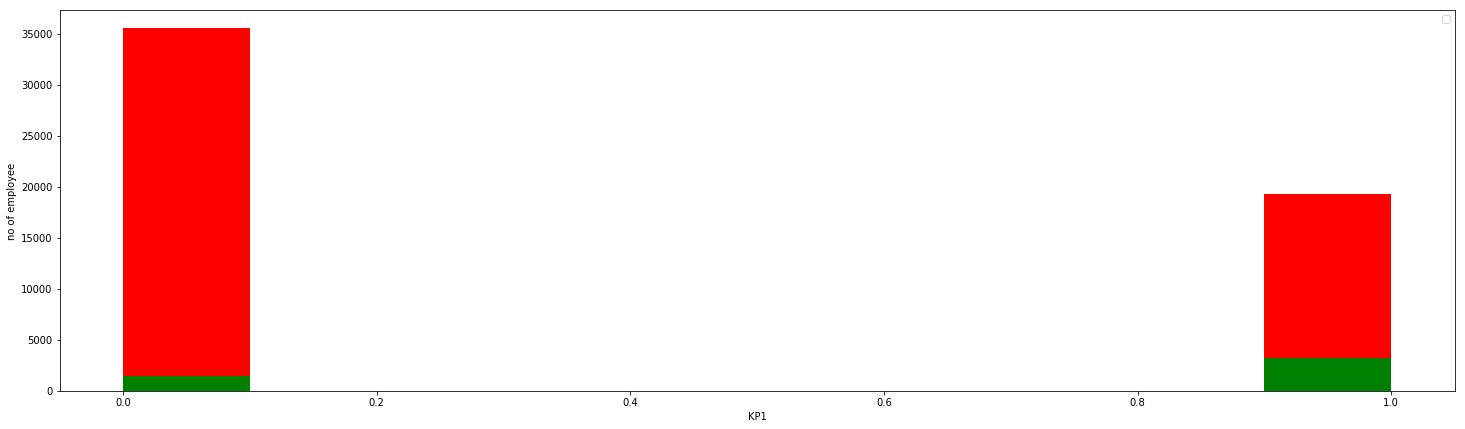

In [21]:
figure=plt.figure(figsize=(25,7))
plt.hist([train[train['is_promoted']==1]['KPIs_met >80%'],train[train['is_promoted'] == 0]['KPIs_met >80%']],stacked=True,
         color = ['g','r'])
plt.xlabel('KP1')
plt.ylabel('no of employee')
plt.legend();

No handles with labels found to put in legend.


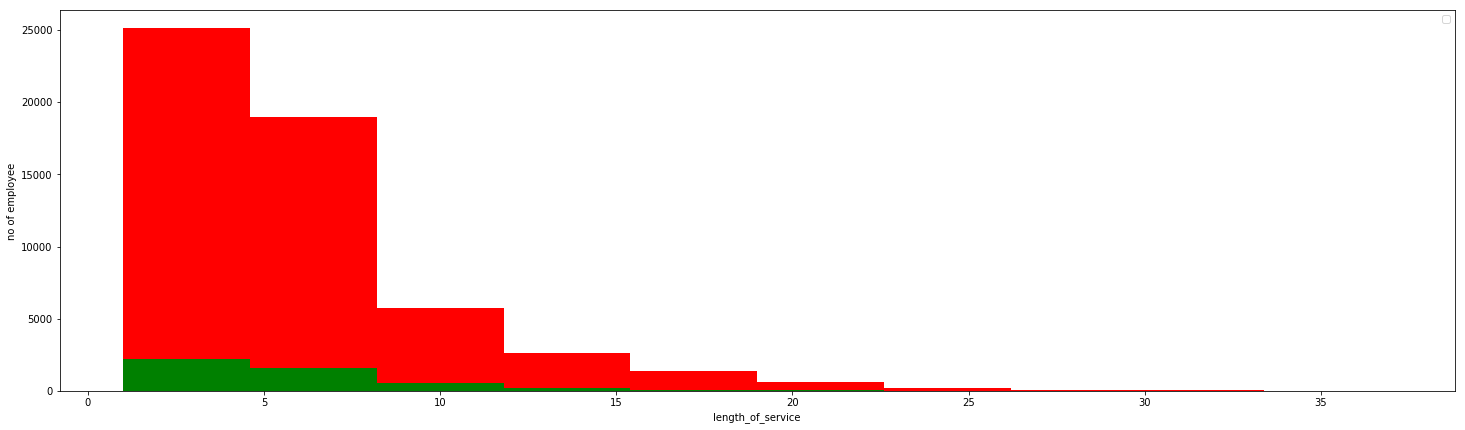

In [22]:
figure=plt.figure(figsize=(25,7))
plt.hist([train[train['is_promoted']==1]['length_of_service'],train[train['is_promoted'] == 0]['length_of_service']],stacked=True,
         color = ['g','r'])
plt.xlabel('length_of_service')
plt.ylabel('no of employee')
plt.legend();

No handles with labels found to put in legend.


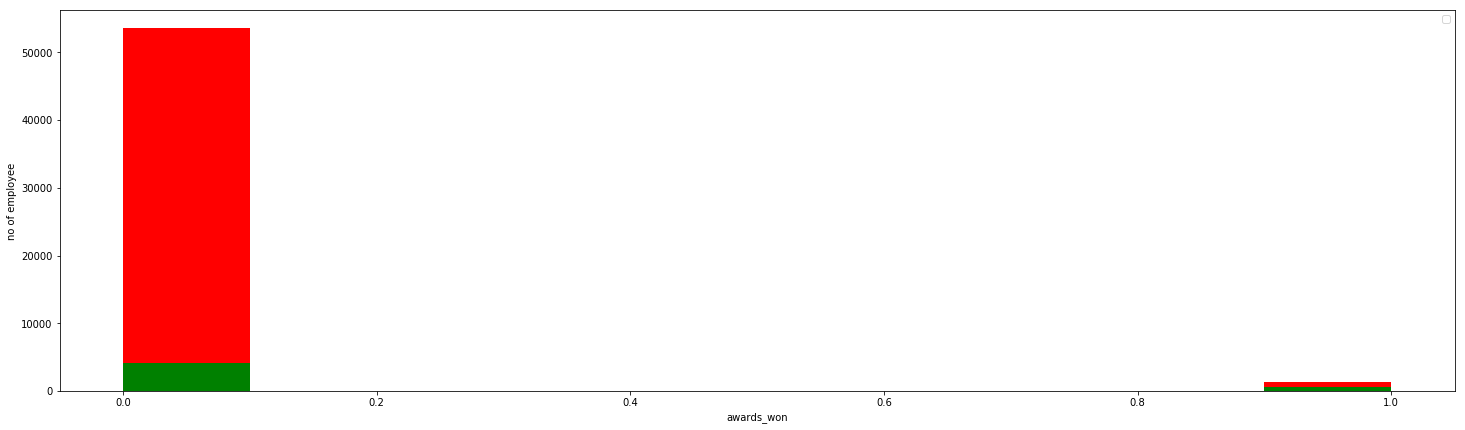

In [23]:
figure=plt.figure(figsize=(25,7))
plt.hist([train[train['is_promoted']==1]['awards_won?'],train[train['is_promoted'] == 0]['awards_won?']],stacked=True,
         color = ['g','r'])
plt.xlabel('awards_won')
plt.ylabel('no of employee')
plt.legend();

No handles with labels found to put in legend.


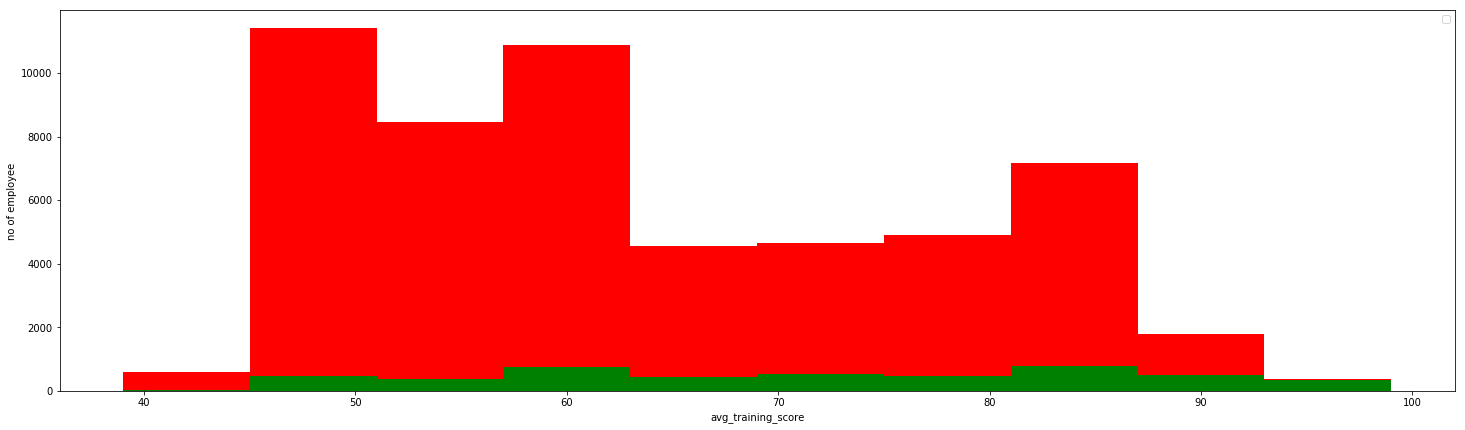

In [24]:
figure=plt.figure(figsize=(25,7))
plt.hist([train[train['is_promoted']==1]['avg_training_score'],train[train['is_promoted'] == 0]['avg_training_score']],stacked=True,
         color = ['g','r'])
plt.xlabel('avg_training_score')
plt.ylabel('no of employee')
plt.legend();

here we can say that people who have 95% or more avg_training_score  must have be promoted

In [25]:
train['region'].describe()

count        54808
unique          34
top       region_2
freq         12343
Name: region, dtype: object

#**Feature Engineering**

In [26]:
def get_combined_data():
    train=pd.read_csv('../input/train_LZdllcl.csv')
    test=pd.read_csv('../input/test_2umaH9m.csv')
    targets=train.is_promoted
    train.drop(['is_promoted'],1,inplace=True)
    #train.shape
    combined = train.append(test)
    combined.reset_index(inplace=True)
    return combined

In [27]:
combined=get_combined_data()


In [28]:
combined.head()

,index,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73


In [29]:
combined.describe()

,index,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,78298.000000,78298.000000,78298.000000,78298.000000,72362.000000,78298.000000,78298.000000,78298.000000,78298.000000
mean,22705.680005,39149.500000,1.253378,34.797619,3.332219,5.848974,0.354032,0.023053,63.349664
std,15508.647352,22602.830026,0.606766,7.665928,1.260982,4.248070,0.478222,0.150073,13.383664
min,0.000000,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,9787.000000,19575.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,19574.000000,39149.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,35232.750000,58723.750000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,54807.000000,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000


In [30]:
combined['previous_year_rating']=combined['previous_year_rating'].fillna(combined['previous_year_rating'].mean())

In [31]:
combined.describe()

,index,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000
mean,22705.680005,39149.500000,1.253378,34.797619,3.332219,5.848974,0.354032,0.023053,63.349664
std,15508.647352,22602.830026,0.606766,7.665928,1.212240,4.248070,0.478222,0.150073,13.383664
min,0.000000,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,9787.000000,19575.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,19574.000000,39149.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,35232.750000,58723.750000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,54807.000000,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000


In [32]:
df=pd.get_dummies(combined['gender'])
df.head()

,f,m
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [33]:
combined=pd.concat([combined,df],axis=1)


In [34]:
combined.head()

,index,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,f,m
0,0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,1,0
1,1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,1
2,2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,1
3,3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,1
4,4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,1


In [35]:
combined=combined.drop('gender',axis=1)
combined.head()

,index,employee_id,department,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,f,m
0,0,65438,Sales & Marketing,region_7,Master's & above,sourcing,1,35,5.0,8,1,0,49,1,0
1,1,65141,Operations,region_22,Bachelor's,other,1,30,5.0,4,0,0,60,0,1
2,2,7513,Sales & Marketing,region_19,Bachelor's,sourcing,1,34,3.0,7,0,0,50,0,1
3,3,2542,Sales & Marketing,region_23,Bachelor's,other,2,39,1.0,10,0,0,50,0,1
4,4,48945,Technology,region_26,Bachelor's,other,1,45,3.0,2,0,0,73,0,1


In [36]:
df=pd.get_dummies(combined['education'])
df.head()

,Bachelor's,Below Secondary,Master's & above
0,0,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [37]:
combined=pd.concat([combined,df],axis=1)

In [38]:
combined=combined.drop('education',axis=1)

In [39]:
df=pd.get_dummies(combined['department'])
combined=pd.concat([combined,df],axis=1)

combined.head()

,index,employee_id,department,region,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,f,m,Bachelor's,Below Secondary,Master's & above,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,0,65438,Sales & Marketing,region_7,sourcing,1,35,5.0,8,1,0,49,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,65141,Operations,region_22,other,1,30,5.0,4,0,0,60,0,1,1,0,0,0,0,0,0,1,0,0,0,0
2,2,7513,Sales & Marketing,region_19,sourcing,1,34,3.0,7,0,0,50,0,1,1,0,0,0,0,0,0,0,0,0,1,0
3,3,2542,Sales & Marketing,region_23,other,2,39,1.0,10,0,0,50,0,1,1,0,0,0,0,0,0,0,0,0,1,0
4,4,48945,Technology,region_26,other,1,45,3.0,2,0,0,73,0,1,1,0,0,0,0,0,0,0,0,0,0,1


In [40]:
combined=combined.drop('department',axis=1)

In [41]:
combined.head()

,index,employee_id,region,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,f,m,Bachelor's,Below Secondary,Master's & above,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,0,65438,region_7,sourcing,1,35,5.0,8,1,0,49,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,65141,region_22,other,1,30,5.0,4,0,0,60,0,1,1,0,0,0,0,0,0,1,0,0,0,0
2,2,7513,region_19,sourcing,1,34,3.0,7,0,0,50,0,1,1,0,0,0,0,0,0,0,0,0,1,0
3,3,2542,region_23,other,2,39,1.0,10,0,0,50,0,1,1,0,0,0,0,0,0,0,0,0,1,0
4,4,48945,region_26,other,1,45,3.0,2,0,0,73,0,1,1,0,0,0,0,0,0,0,0,0,0,1


In [42]:
df=pd.get_dummies(combined['recruitment_channel'])
combined = pd.concat([combined,df],axis=1)
combined=combined.drop('recruitment_channel',axis=1)
combined.head()

,index,employee_id,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,f,m,Bachelor's,Below Secondary,Master's & above,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,other,referred,sourcing
0,0,65438,region_7,1,35,5.0,8,1,0,49,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,1,65141,region_22,1,30,5.0,4,0,0,60,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,2,7513,region_19,1,34,3.0,7,0,0,50,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,3,2542,region_23,2,39,1.0,10,0,0,50,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,4,48945,region_26,1,45,3.0,2,0,0,73,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [43]:
#df=pd.get_dummies(combined['region'])
#combined = pd.concat([combined,df],axis=1)
combined = combined.drop('region',axis=1)
combined.head()

,index,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,f,m,Bachelor's,Below Secondary,Master's & above,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,other,referred,sourcing
0,0,65438,1,35,5.0,8,1,0,49,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,1,65141,1,30,5.0,4,0,0,60,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,2,7513,1,34,3.0,7,0,0,50,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,3,2542,2,39,1.0,10,0,0,50,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,4,48945,1,45,3.0,2,0,0,73,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [44]:
combined['age']=pd.qcut(combined['age'],8,labels=['age1','age2','age3','age4','age5','age6','age7','age8'])
combined=pd.concat([combined,pd.get_dummies(combined['age'])],axis=1)
combined.head()

,index,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,f,m,Bachelor's,Below Secondary,Master's & above,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,other,referred,sourcing,age1,age2,age3,age4,age5,age6,age7,age8
0,0,65438,1,age5,5.0,8,1,0,49,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
1,1,65141,1,age3,5.0,4,0,0,60,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,2,7513,1,age5,3.0,7,0,0,50,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,3,2542,2,age6,1.0,10,0,0,50,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,4,48945,1,age8,3.0,2,0,0,73,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1


In [45]:
combined=combined.drop('age',axis=1)

In [46]:
combined.head()

,index,employee_id,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,f,m,Bachelor's,Below Secondary,Master's & above,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,other,referred,sourcing,age1,age2,age3,age4,age5,age6,age7,age8
0,0,65438,1,5.0,8,1,0,49,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
1,1,65141,1,5.0,4,0,0,60,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,2,7513,1,3.0,7,0,0,50,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,3,2542,2,1.0,10,0,0,50,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,4,48945,1,3.0,2,0,0,73,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1


In [47]:
combined['avg_training_score']=pd.qcut(combined['avg_training_score'],12,labels=['avg_training_score1','avg_training_score2','avg_training_score3','avg_training_score4',
                                                                                'avg_training_score5','avg_training_score6','avg_training_score7','avg_training_score8','avg_training_score9',
                                                                                'avg_training_score10','avg_training_score11','avg_training_score12'])

In [48]:
combined=pd.concat([combined,pd.get_dummies(combined['avg_training_score'])],axis=1)
combined.head()

,index,employee_id,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,f,m,Bachelor's,Below Secondary,Master's & above,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,other,referred,sourcing,age1,age2,age3,age4,age5,age6,age7,age8,avg_training_score1,avg_training_score2,avg_training_score3,avg_training_score4,avg_training_score5,avg_training_score6,avg_training_score7,avg_training_score8,avg_training_score9,avg_training_score10,avg_training_score11,avg_training_score12
0,0,65438,1,5.0,8,1,0,avg_training_score2,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,65141,1,5.0,4,0,0,avg_training_score6,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,7513,1,3.0,7,0,0,avg_training_score3,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,2542,2,1.0,10,0,0,avg_training_score3,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,4,48945,1,3.0,2,0,0,avg_training_score9,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [49]:
combined=combined.drop('avg_training_score',axis=1)
combined.head()

,index,employee_id,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,f,m,Bachelor's,Below Secondary,Master's & above,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,other,referred,sourcing,age1,age2,age3,age4,age5,age6,age7,age8,avg_training_score1,avg_training_score2,avg_training_score3,avg_training_score4,avg_training_score5,avg_training_score6,avg_training_score7,avg_training_score8,avg_training_score9,avg_training_score10,avg_training_score11,avg_training_score12
0,0,65438,1,5.0,8,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,65141,1,5.0,4,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,7513,1,3.0,7,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,2542,2,1.0,10,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,4,48945,1,3.0,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [50]:
combined.shape

(78298, 44)

In [51]:
#combined['length_of_service']=pd.qcut(combined['length_of_service'],34,labels=['length_of_service1','length_of_service2','length_of_service3','length_of_service4',
 ##                                                                            'length_of_service9','length_of_service10','length_of_service11','length_of_service12',
   #                                                                           'length_of_service13','length_of_service14','length_of_service15','length_of_service16',
    #                                                                          'length_of_service17','length_of_service18','length_of_service19','length_of_service20',
     #                                                                         'length_of_service21','length_of_service22','length_of_service23','length_of_service24',
      #                                                                        'length_of_service25','length_of_service26','length_of_service27','length_of_service28',
       #                                                                       'length_of_service29','length_of_service30','length_of_service31','length_of_service32',
        #                                                                     'length_of_service33','length_of_service34'],duplicates='drop')
#combined=pd.concat([combined,pd.get_dummies(combined['length_of_service'])],axis=1)
#combined.head()

In [52]:
x_train=combined.iloc[:54808]
y_train=pd.DataFrame(train['is_promoted'])
y_train.shape

(54808, 1)

In [53]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [54]:
x_test=combined.iloc[54808:]

In [55]:
x_test.shape

(23490, 44)

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_train,y_train,test_size=0.3)

In [57]:
#clfd=XGBClassifier()
#clfd.fit(x_train,y_train)
clfd=RandomForestClassifier()
clfd.fit(X_train,Y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
features = pd.DataFrame()
features['feature'] = x_train.columns
features['importance'] = clfd.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

In [59]:
features.plot(kind='barh',figsize=(150,150))
plt.legend()

In [60]:
print(features.sort_values(by=['importance']))

                      importance
feature                         
Below Secondary         0.001885
Legal                   0.002713
avg_training_score4     0.004634
referred                0.004663
HR                      0.004917
avg_training_score1     0.005265
avg_training_score3     0.005537
avg_training_score2     0.006604
avg_training_score11    0.007113
age8                    0.007994
avg_training_score10    0.008083
avg_training_score5     0.008095
age1                    0.008172
R&D                     0.008278
Master's & above        0.008615
avg_training_score6     0.008946
Finance                 0.009285
age7                    0.009550
Technology              0.010145
age6                    0.010302
age2                    0.010719
age3                    0.010995
avg_training_score9     0.011060
Bachelor's              0.011126
age4                    0.011393
age5                    0.012701
m                       0.012718
f                       0.013908
Analytics 

In [61]:
#combined.drop(['region_18','region_34','region_9','region_33','region_33','region_'])

In [62]:
predict=clfd.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix,classification_report

In [64]:
print(confusion_matrix(Y_test,predict))
print(classification_report(Y_test,predict))

[[14919   106]
 [ 1028   390]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     15025
           1       0.79      0.28      0.41      1418

   micro avg       0.93      0.93      0.93     16443
   macro avg       0.86      0.63      0.69     16443
weighted avg       0.92      0.93      0.92     16443



In [65]:
#from sklearn.model_selection import StratifiedKFold
#skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
#for train_index, test_index in skf.split(x_train,y_train): 
    #print("Train:", train_index, "Validation:", test_index) 
   # X_train, X_test = x_train[train_index], x_train[test_index] 
   # y_train, y_test = y_train[train_index], y_train[test_index]

In [66]:
predict1=clfd.predict(x_test)

In [67]:
sample['is_promoted']=pd.DataFrame(predict1)


In [68]:
sample.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [69]:
sample.to_csv('submission.csv',index=False)